<a href="https://colab.research.google.com/github/MohdHassanS/Take_Home_users/blob/main/Take_home_user.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading the Datasets**

In [73]:
import pandas as pd
import numpy as np

In [74]:
df1=pd.read_csv("/content/takehome_user_engagement.csv")

In [75]:
df2=pd.read_csv("/content/takehome_users.csv", encoding='utf-8', encoding_errors='ignore')

In [76]:
df1.head()

time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

In [77]:
df2.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id  
0             10803.0  
1               316.0  
2              1525.0  
3              5151.0  
4              5240.0

# **Information of the DataFrame**

In [78]:
df1.describe()

user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [80]:
df2.describe()

object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03              12000.000000   
mean    6000.50000                1.379279e+09                  0.249500   
std     3464.24595                1.953116e+07                  0.432742   
min        1.00000                1.338452e+09                  0.000000   
25%     3000.75000                1.363195e+09                  0.000000   
50%     6000.50000                1.382888e+09                  0.000000   
75%     9000.25000                1.398443e+09                  0.000000   
max    12000.00000                1.402067e+09                  1.000000   

       enabled_for_marketing_drip        org_id  invited_by_user_id  
count                12000.000000  12000.000000         6417.000000  
mean                     0.149333    141.884583         5962.957145  
std                      0.356432    124.056723         3383.761968  
min                      0.000000      0.000000            3.000000  
25%                      0.000000     29.000000         3058.000000  
50%                      0.000000    108.000000         5954.000000  
75%                      0.000000    238.250000         8817.000000  
max                      1.000000    416.000000        11999.000000

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# **Adding New Column - week_no**

In [82]:
week_no = pd.to_datetime(df1['time_stamp'])
week_no = week_no.dt.week
#print(week_no.head())
df1.insert(1, "week_no", week_no, True)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


time_stamp  week_no  user_id  visited
0  2014-04-22 03:53:30       17        1        1
1  2013-11-15 03:45:04       46        2        1
2  2013-11-29 03:45:04       48        2        1
3  2013-12-09 03:45:04       50        2        1
4  2013-12-25 03:45:04       52        2        1

# **Adding New Column - year+week_no**

Taking year from the **time_stamp** column

In [83]:
year=[i[:4] for i in df1['time_stamp']]
print(year)

['2014', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2013', '2013', '2013', '2013', '2012', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013',

Merging **Year+week_no**

In [84]:
year_week=[(i+'-'+str(j)) for i,j in zip(year, df1['week_no'])]
print(year_week)

['2014-17', '2013-46', '2013-48', '2013-50', '2013-52', '2013-1', '2014-2', '2014-6', '2014-6', '2014-6', '2014-7', '2014-7', '2014-10', '2014-11', '2014-14', '2013-12', '2013-21', '2013-4', '2013-51', '2012-51', '2013-3', '2013-4', '2013-5', '2013-6', '2013-6', '2013-7', '2013-7', '2013-8', '2013-9', '2013-9', '2013-9', '2013-10', '2013-10', '2013-11', '2013-11', '2013-12', '2013-12', '2013-13', '2013-14', '2013-15', '2013-15', '2013-15', '2013-16', '2013-16', '2013-17', '2013-17', '2013-17', '2013-18', '2013-18', '2013-18', '2013-18', '2013-19', '2013-19', '2013-19', '2013-19', '2013-19', '2013-20', '2013-20', '2013-20', '2013-21', '2013-21', '2013-22', '2013-22', '2013-23', '2013-23', '2013-23', '2013-23', '2013-24', '2013-24', '2013-24', '2013-24', '2013-24', '2013-25', '2013-25', '2013-25', '2013-26', '2013-26', '2013-26', '2013-27', '2013-27', '2013-27', '2013-27', '2013-28', '2013-28', '2013-28', '2013-29', '2013-29', '2013-29', '2013-29', '2013-29', '2013-30', '2013-30', '2013-

Adding **year_week** into the dataframe **df1**

In [85]:
y_w = pd.Series(year_week)
df1.insert(1, "year-week", y_w, True)
df1.head()

time_stamp year-week  week_no  user_id  visited
0  2014-04-22 03:53:30   2014-17       17        1        1
1  2013-11-15 03:45:04   2013-46       46        2        1
2  2013-11-29 03:45:04   2013-48       48        2        1
3  2013-12-09 03:45:04   2013-50       50        2        1
4  2013-12-25 03:45:04   2013-52       52        2        1

# **Finding The adopted Users**

In [86]:
adopted_users=[]
for i in df2['object_id']:

  g=df1[(df1['user_id'] == i)]

  if (len(g)>=3):
    l=[j for j in g['year-week']]

    for k in l:

      if(l.count(k) >= 3):
        adopted_users.append(i)
        break

In [87]:
print(adopted_users)

[2, 10, 20, 33, 42, 43, 53, 63, 69, 74, 80, 81, 82, 87, 133, 135, 141, 146, 153, 160, 165, 168, 174, 185, 188, 197, 200, 202, 203, 209, 214, 230, 245, 247, 263, 265, 275, 280, 283, 297, 298, 305, 310, 311, 322, 341, 351, 363, 370, 383, 401, 418, 430, 445, 450, 462, 469, 471, 472, 479, 483, 492, 494, 497, 509, 510, 512, 518, 522, 529, 535, 540, 547, 553, 564, 572, 589, 601, 603, 605, 618, 627, 628, 632, 634, 639, 669, 679, 680, 724, 725, 728, 754, 772, 783, 786, 804, 828, 845, 851, 869, 874, 882, 885, 901, 906, 907, 912, 928, 932, 934, 937, 943, 953, 980, 985, 1007, 1009, 1013, 1017, 1018, 1027, 1035, 1055, 1061, 1072, 1089, 1093, 1094, 1099, 1106, 1107, 1119, 1124, 1128, 1129, 1136, 1145, 1150, 1151, 1155, 1156, 1163, 1173, 1186, 1196, 1202, 1214, 1233, 1235, 1238, 1242, 1245, 1250, 1274, 1280, 1290, 1318, 1319, 1320, 1327, 1339, 1343, 1345, 1350, 1357, 1361, 1368, 1379, 1396, 1407, 1410, 1411, 1421, 1434, 1464, 1472, 1476, 1479, 1480, 1481, 1485, 1506, 1507, 1508, 1525, 1546, 1555, 15

In [88]:
len(adopted_users)

1444

# **Creating Adopted_users column**

In [89]:
df2['adopted_users']=''

In [90]:
df2.head()

object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2                         0                           0      94   
3                         0                           0       1   
4                         0                           0     193   

   invited_by_user_id adopted_users  
0             10803.0                
1               316.0                
2              1525.0                
3              5151.0                
4              5240.0

# **Updating Adopted_user  with value (1 or 0)**

In [91]:
for i in df2['object_id']:
  if i in adopted_users:
    df2.loc[i-1,'adopted_users'] = 1
  else:
    df2.loc[i-1,'adopted_users'] = 0

In [92]:
df2.count()

object_id                     12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
adopted_users                 12000
dtype: int64

In [93]:
df2.loc[df2.index[[i for i in range(10)]], ['object_id', 'name', 'adopted_users']]

object_id               name adopted_users
0          1     Clausen August             0
1          2      Poole Matthew             1
2          3  Bottrill Mitchell             0
3          4    Clausen Nicklas             0
4          5          Raw Grace             0
5          6      Cunha Eduardo             0
6          7       Sewell Tyler             0
7          8  Hamilton Danielle             0
8          9         Amsel Paul             0
9         10       Santos Carla             1

# **Data visualization**

**Recommended :** Restart runtime after intalling
```
!pip install matplotlib --upgrade  
```

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**For a complete EDA (Exploratory Data Analysis) use this code**  

```
!pip install dataprep  
from dataprep.eda import create_report  
create_report(df2)  
```

**Seperating the Users**

In [95]:
au = df2[df2['adopted_users']==1] # creating new dataframe for adopted users
n_au=df2[df2['adopted_users']==0] # creating new dataframe for non adopted users

**No of (Adopted & Non Adopted Users)**

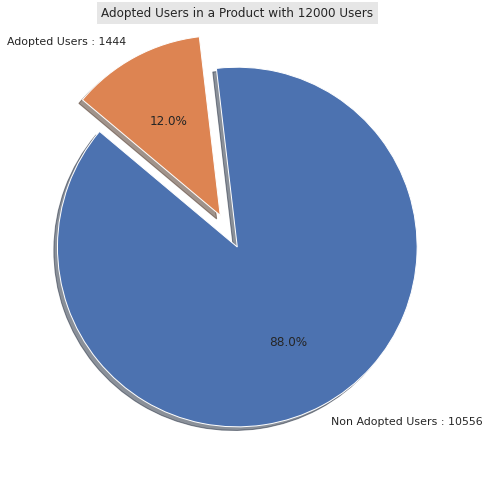

In [96]:
z=df2['adopted_users'].value_counts()
y = np.array(z)
mylabels=['Non Adopted Users : '+str(z[0]),'Adopted Users : '+str(z[1])]
explode = (0,0.2) 
plt.title("Adopted Users in a Product with "+str(z.sum())+" Users",  bbox={'facecolor':'0.9', 'pad':5})
plt.pie(y, labels=mylabels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

**visualizing based on Creation Source**

[Text(0, 0, '491'),
 Text(0, 0, '326'),
 Text(0, 0, '275'),
 Text(0, 0, '206'),
 Text(0, 0, '146')]

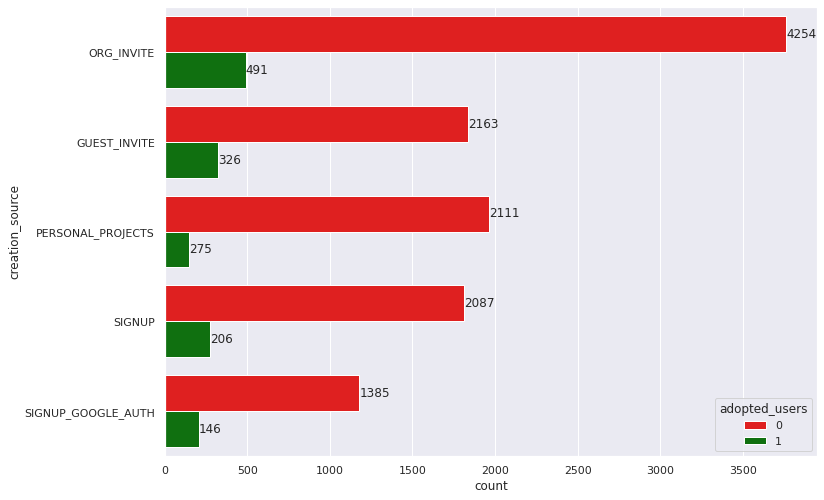

In [97]:
ax=sns.countplot(y="creation_source", data=df2 ,hue='adopted_users', order=df2['creation_source'].value_counts(ascending=False).index, palette=['red','green'])

abs_values1 = df2['creation_source'].value_counts(ascending=False).values
abs_values2 = au['creation_source'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values1)
ax.bar_label(container=ax.containers[1], labels=abs_values2)

**To know the corelation of Adopted Users column**

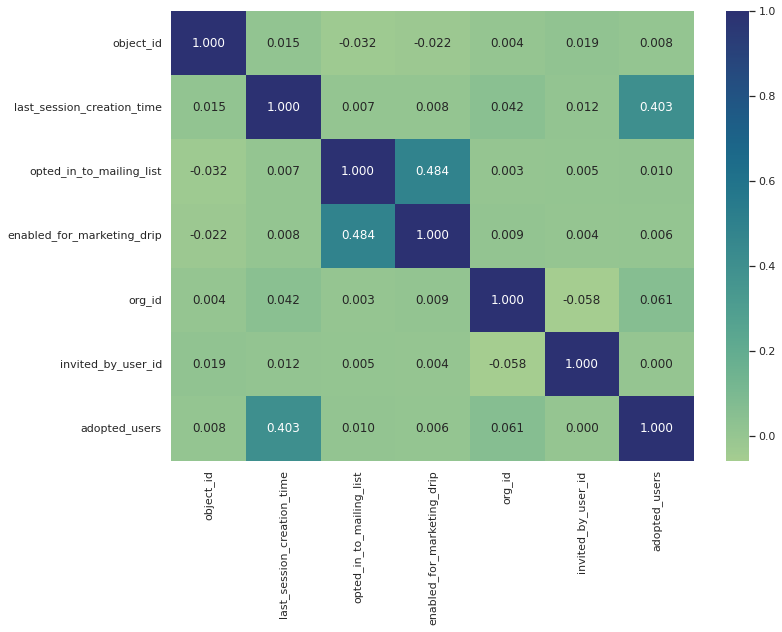

In [98]:
df2.to_csv('file.csv', index=False)
df = pd.read_csv("/content/file.csv")
ax = sns.heatmap(df.corr(), annot=True, fmt=".3f", cmap="crest")

In [99]:
df2.last_session_creation_time = pd.to_datetime(df.last_session_creation_time,unit='s')

In [100]:
df2.insert(6, 'Month_Year', df2['last_session_creation_time'].dt.to_period('M'))

Text(0, 0.5, 'Users Last Login')

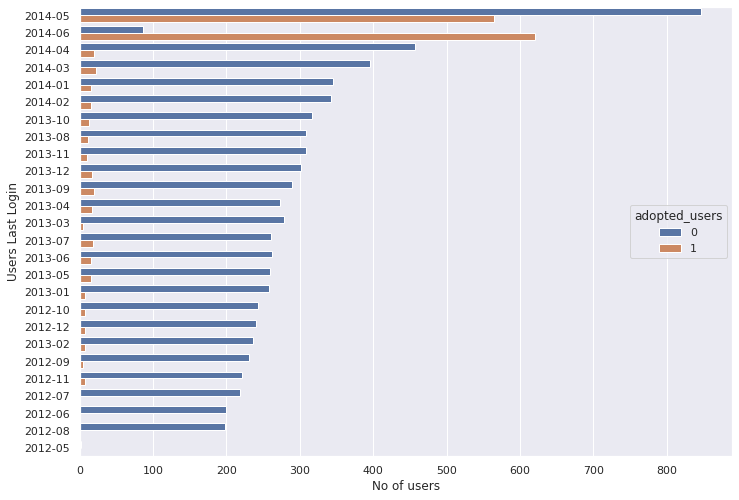

In [101]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
c = sns.countplot(y='Month_Year', data=df2 ,hue='adopted_users', order=df2['Month_Year'].value_counts(ascending=False).index)
c.set_xlabel('No of users')
c.set_ylabel('Users Last Login')

# **Tables**

**Top 3 organization where most users come from**

In [102]:
df = pd.DataFrame(df2['org_id'].value_counts().head(3)).reset_index()
df.columns = ['Org_id', 'No of users']
df

Org_id  No of users
0       0          319
1       1          233
2       2          201

**Top 3 user Ids who invited more peoples into the product**

In [103]:
df = pd.DataFrame(df2['invited_by_user_id'].value_counts().head(5)).reset_index()
df.columns = ['invited_by_user_id', 'No of users']
df

invited_by_user_id  No of users
0             10741.0           13
1              2527.0           12
2              1525.0           11
3             11770.0           11
4              2308.0           11

**Creating a new Dataframe for a better view**

In [104]:
data={
    'adopted users(1444)':[ len(au[au['opted_in_to_mailing_list']==1]), 
                           len(au[au['enabled_for_marketing_drip']==1]), 
                           len(au[(au['opted_in_to_mailing_list']==1) & (au['enabled_for_marketing_drip']==1)]),
                           len(au[au['creation_source']=='ORG_INVITE']) ],
    
    'non adopted users(10,556)':[ len(n_au[n_au['opted_in_to_mailing_list']==1]),
                                 len(n_au[n_au['enabled_for_marketing_drip']==1]), 
                                 len(n_au[(n_au['opted_in_to_mailing_list']==1) & (n_au['enabled_for_marketing_drip']==1)]),
                                 len(n_au[n_au['creation_source']=='ORG_INVITE']) ],
    
    'Total(12,000)':[ len(df2[df2['opted_in_to_mailing_list']==1]), 
                     len(df2[df2['enabled_for_marketing_drip']==1]), 
                     len(df2[(df2['opted_in_to_mailing_list']==1) & (df2['enabled_for_marketing_drip']==1)]),
                     len(df2[df2['creation_source']=='ORG_INVITE']) ]
}
label =[ 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'for both','From org invite']
df = pd.DataFrame(data, index=label)
df

adopted users(1444)  non adopted users(10,556)  \
opted_in_to_mailing_list                    378                       2616   
enabled_for_marketing_drip                  224                       1568   
for both                                    171                       1171   
From org invite                             491                       3763   

                            Total(12,000)  
opted_in_to_mailing_list             2994  
enabled_for_marketing_drip           1792  
for both                             1342  
From org invite                      4254

Hope you find it useful..  
still I May miss So Many Insights...If so..Pin me..  